## Lab 1: Machine Learning Engineering

- Pablo Escobar
- Diego Cordova 20212
- Paola Contreras
- Paola de León
- Jun Woo
- Sebastian

In [36]:
import pandas as pd

In [37]:
# save filepath to variable for easier access
melbourne_file_path = './input/melbourne-housing-snapshot/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


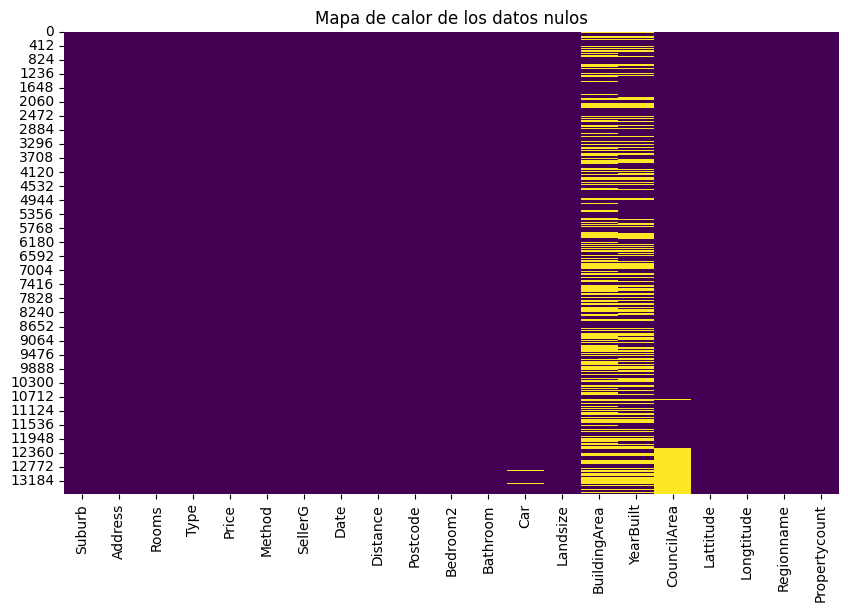

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(melbourne_data.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de los datos nulos')
plt.show()


In [39]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [40]:
melbourne_data = melbourne_data.dropna(axis=0)

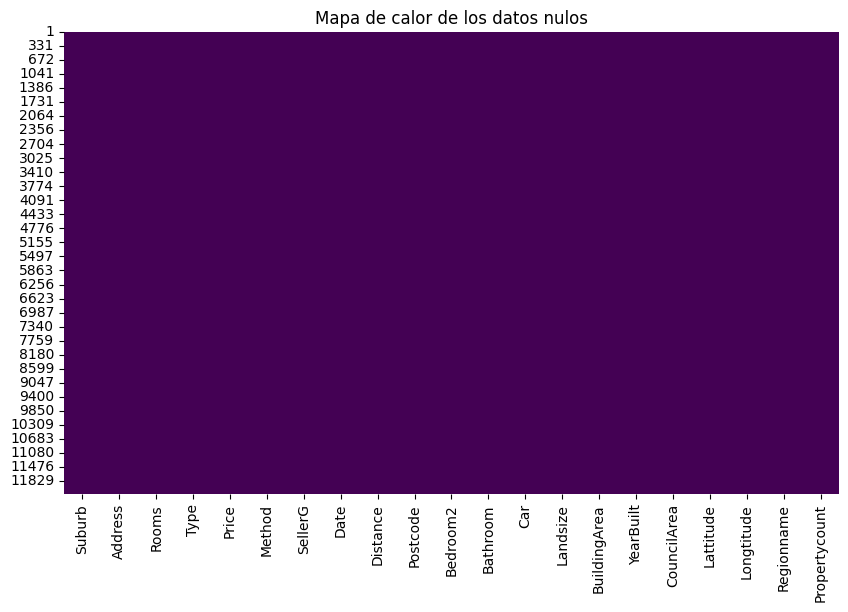

In [41]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(melbourne_data.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de los datos nulos')
plt.show()


In [42]:
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


### Train Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

### Elección de Modelo

En este caso se utilizó un GridSearch para encontrar para comparar varios modelos con varios parámetros con el finde evaluarlos con el dataset y encontrar el que brinda mejor rendimiento. Para esto se compararon los siguientes modelos:
- Regresión Lineal
- Árbol de Decisión
- Random Forest
- Support Vector Machines

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.svm import LinearSVR
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('regr', LinearRegression())  # Default model, will be overridden by GridSearch
])

search_space = [
    {'regr': [LinearRegression()], 'regr__fit_intercept': [True, False]},
    {'regr': [tree.DecisionTreeRegressor()], 
    'regr__max_depth': [None, 10, 20]},

    {'regr': [RandomForestRegressor()],
    'regr__n_estimators': [10, 50, 100],
    'regr__max_depth': [None, 10, 20],
    'regr__max_features': ['auto', 'sqrt', 'log2', None, 0.2, 0.5]},

    {'regr': [LinearSVR()],
    'regr__epsilon': [0.01, 0.1, 1, 10, 100]}
]

gs = GridSearchCV(pipeline, param_grid = search_space, scoring = 'neg_mean_squared_error', cv = 5)
gs.fit(X_train, y_train)

c:\github\Semestre_X\MLE\Lab1-MLE\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\github\Semestre_X\MLE\Lab1-MLE\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\github\Semestre_X\MLE\Lab1-MLE\venv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\github\Semestre_X\MLE\Lab1-MLE\venv\lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estima

GridSearchCV(cv=5, estimator=Pipeline(steps=[('regr', LinearRegression())]),
             param_grid=[{'regr': [LinearRegression()],
                          'regr__fit_intercept': [True, False]},
                         {'regr': [DecisionTreeRegressor()],
                          'regr__max_depth': [None, 10, 20]},
                         {'regr': [RandomForestRegressor()],
                          'regr__max_depth': [None, 10, 20],
                          'regr__max_features': ['auto', 'sqrt', 'log2', None,
                                                 0.2, 0.5],
                          'regr__n_estimators': [10, 50, 100]},
                         {'regr': [LinearSVR()],
                          'regr__epsilon': [0.01, 0.1, 1, 10, 100]}],
             scoring='neg_mean_squared_error')

In [45]:
best_pipeline = gs.best_estimator_
best_regression_model = best_pipeline.named_steps['regr']
best_model_hyperparameters = best_regression_model.get_params()

print("> Best Regresion Model:", best_regression_model)
print("> Best Hyper-parameters:", best_model_hyperparameters)

> Best Regresion Model: RandomForestRegressor(max_depth=20, max_features=None)
> Best Hyper-parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


En este caso el modelo con mejor rendimiento fue el RandomForest, además se logró encontrar los hiperparámetros más adecuados con el mismo gridSearch

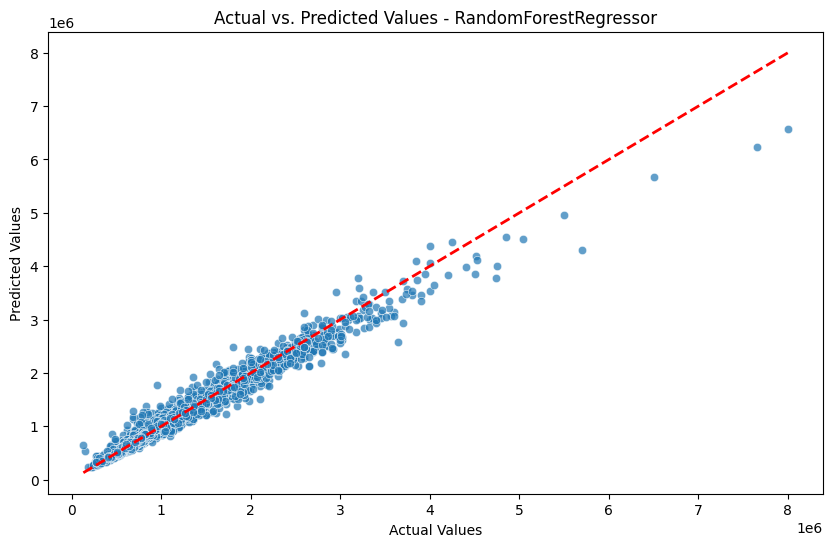

In [48]:
model = best_regression_model
y_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)  # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - RandomForestRegressor')
plt.show()
